In [ ]:
!pip install pandas scikit-learn nltk
!pip install openpyxl
!pip install matplotlib
!pip install seaborn
!pip install gensim

In [2]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import re
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [4]:
file_path_mainpage = 'D:/ssicsync/Webscrap/Webscrape Org Mainpage (Text).xlsx'
file_path_subpage = 'D:/ssicsync/Webscrap/Webscrape Org Subpage (Text).xlsx'
df_main = pd.read_excel(file_path_mainpage)
df_sub= pd.read_excel(file_path_subpage)

In [5]:
ref = pd.read_csv('D:/ssicsync/Webscrap//List of 90 Coy and SSIC.csv')
ssic = pd.read_excel('D:/ssicsync/ssic2020-detailed-definitions.xlsx', skiprows=[0,1,2,3], usecols=[0,1,3,5])

d:\Anaconda\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


EDA

In [6]:
df_main
#df_main.shape[0]

,Company,Linkedin Page,Org Category,Org Website,Text Content,Org Website Content,Filtered Links,Extracted Text
0,ABR HOLDINGS LIMITED,https://www.linkedin.com/company/abr-holdings-...,Food & Beverages,http://www.abr.com.sg/,ABR Holdings Limited (“ABR”) began as the owne...,"<html lang=""en-US"" class=""has-wpcom-gifting-ba...",['https://abr.com.sg/about-abr/'],ABR Holdings Limited ...
1,ABUNDANCE INTERNATIONAL LIMITED,https://www.linkedin.com/company/life-in-abund...,Non-profit Organizations,https://lifeinabundance.org,Life In Abundance International (LIA) is an Af...,"<html lang=""en-US"" class=""js js_active vc_des...",[],Home Page - Life In Abundance International ...
2,ABUNDANTE LIMITED,https://www.linkedin.com/company/abundantesegu...,Insurance,http://www.abundanteseguros.com.br,Abundante Corretora de Seguros - Todos os Ramos,"<html lang=""pt""><head>\n \n <meta charset=""u...",[],Abundante Corretora de Seguros Abundante Segu...
3,ACCRELIST LTD,https://www.linkedin.com/company/accrelist-ai-...,IT Services and IT Consulting,http://www.weh.sg/,Our Business scope:\n1. -Aesthestics Platform ...,<html><head>\n<title>403 Forbidden</title>\n</...,[],403 Forbidden Forbidden You don't have perm...
4,ACESIAN PARTNERS LIMITED,https://www.linkedin.com/company/acesiansystem...,Information Technology & Services,http://www.acesiansystems.com,Created in 2016 as part of the longer-establis...,NaN,[],NaN
...,...,...,...,...,...,...,...,...
85,TELECHOICE INTERNATIONAL LIMITED,https://www.linkedin.com/company/telechoiceint...,Telecommunications,http://www.telechoice.com.sg,We are a regional diversified provider and ena...,"<html lang=""en"" class="" js flexbox flexboxlega...",['http://telechoice.listedcompany.com/profile....,TeleChoice International Limited Welcome to T...
86,TT INTERNATIONAL LIMITED,https://www.linkedin.com/company/tt-internatio...,NaN,http://tt-intl.com,NaN,"<html lang=""en""><head>\n \n <meta charset=""u...",[],Home TT International Ltd ...
87,UNITED OVERSEAS INSURANCE LIMITED,https://www.linkedin.com/company/united-overse...,Insurance,https://www.uoi.com.sg/,"Founded in 1971, United Overseas Insurance Lim...","<html><head>\n<script type=""text/javascript"" s...",['https://www.uoi.com.sg//about/corporate-deve...,United Overseas Insurance Limited (UOI) ...
88,VENTURE CORPORATION LIMITED,https://www.linkedin.com/company/venturecorpor...,"Appliances, Electrical, and Electronics Manufa...",https://www.venture.com.sg/,Venture (SGX: V03.SI) was formed in 1989 throu...,"<html lang=""en-US""><head>\n\t<meta charset=""UT...",['https://www.venture.com.sg/about/'],Venture Corporation Limited – Official Website...


In [7]:
df_sub
#df_sub.shape[0]

,Company,Filtered Links,Org Website Content,Extracted Text
0,ABR HOLDINGS LIMITED,http://www.abr.com.sg/,"<html lang=""en-US"" class=""has-wpcom-gifting-ba...",ABR Holdings Limited ...
1,ABR HOLDINGS LIMITED,https://abr.com.sg/about-abr/,"<html lang=""en-US"" class=""has-wpcom-gifting-ba...",ABR Holdings Limited ...
2,ABUNDANCE INTERNATIONAL LIMITED,https://lifeinabundance.org,"<html lang=""en-US"" class=""js js_active vc_des...",Home Page - Life In Abundance International ...
3,ABUNDANTE LIMITED,http://www.abundanteseguros.com.br,"<html lang=""pt""><head>\n \n <meta charset=""u...",Abundante Corretora de Seguros Abundante Segu...
4,ACCRELIST LTD,http://www.weh.sg/,<html><head>\n<title>403 Forbidden</title>\n</...,403 Forbidden Forbidden You don't have perm...
...,...,...,...,...
255,VICOM LTD,https://www.vicom.com.sg/About/Our-Vision-Miss...,"<html lang=""en-US""><head id=""Head""><meta conte...",VICOM About Key Management ...
256,VICOM LTD,https://www.vicom.com.sg/Financials/News-About-Us,"<html lang=""en-US""><head id=""Head""><meta conte...",VICOM About Key Management ...
257,VICOM LTD,https://www.vicom.com.sg/About/Corporate-Respo...,"<html lang=""en-US""><head id=""Head""><meta conte...",VICOM About Key Management ...
258,VICOM LTD,https://www.vicom.com.sg/About/Board-Of-Directors,"<html lang=""en-US""><head id=""Head""><meta conte...",VICOM About Key Management ...


In [8]:
print ("Duplicates in df_main extracted text:" ,df_main['Extracted Text'].duplicated().sum())
print("Duplicates in df_main company name:" , df_main['Company'].duplicated().sum())
df_main.shape[0]

Duplicates in df_main extracted text: 11
Duplicates in df_main company name: 0


90

In [9]:
print ("Duplicates in df_sub extracted text:" ,df_sub['Extracted Text'].duplicated().sum())
print("Duplicates in df_sub company name:" , df_sub['Company'].duplicated().sum())
df_sub.shape[0]

Duplicates in df_sub extracted text: 181
Duplicates in df_sub company name: 170


260

In [10]:
df_main = df_main.drop_duplicates(subset=['Extracted Text'])
df_main.shape[0]

79

In [10]:
df_sub = df_sub.drop_duplicates(subset=['Extracted Text'])
df_sub = df_sub.drop_duplicates(subset=['Company'])
df_sub.reset_index(drop=True, inplace=True)
#print(df_sub['Extracted Text'].duplicated().sum()) 
df_sub.shape[0]

79

In [11]:
data = df_main[df_main['Extracted Text'].apply(lambda x: len(str(x)) >= 4)]
data = data[~data['Extracted Text'].str.contains('403', case=False)]
data = data[~data['Extracted Text'].str.contains('Nan', case=False)]

df_sub = df_sub[df_sub['Extracted Text'].apply(lambda x: len(str(x)) >= 4)]
df_sub = df_sub[~df_sub['Extracted Text'].str.contains('403', case=False)]
df_sub = df_sub[~df_sub['Extracted Text'].str.contains('404 Not Found', case=False)]
df_sub = df_sub[~df_sub['Extracted Text'].str.contains('Nan', case=False)]

In [12]:
#Standadise format
data['Extracted Text'] = data['Extracted Text'].str.strip()
data['Extracted Text'] = data['Extracted Text'].str.replace('\r\n', ' ', regex=False)
data['Extracted Text'] = data['Extracted Text'].str.replace('\n', ' ', regex=False)
data['Extracted Text'] = data['Extracted Text'].str.lower()
data.head()

,Company,Linkedin Page,Org Category,Org Website,Text Content,Org Website Content,Filtered Links,Extracted Text
0,ABR HOLDINGS LIMITED,https://www.linkedin.com/company/abr-holdings-...,Food & Beverages,http://www.abr.com.sg/,ABR Holdings Limited (“ABR”) began as the owne...,"<html lang=""en-US"" class=""has-wpcom-gifting-ba...",['https://abr.com.sg/about-abr/'],abr holdings limited ...
2,ABUNDANTE LIMITED,https://www.linkedin.com/company/abundantesegu...,Insurance,http://www.abundanteseguros.com.br,Abundante Corretora de Seguros - Todos os Ramos,"<html lang=""pt""><head>\n \n <meta charset=""u...",[],abundante corretora de seguros abundante segu...
5,ACMA LTD,https://www.linkedin.com/company/acma-engineer...,HVAC and Refrigeration Equipment Manufacturing,https://www.acmaeng.com.sg/,Acma Engineers Pte Ltd - Singapore (Hot Line :...,"<html lang=""en""><head>\n <meta charset=""utf...",['https://www.acmaeng.com.sg//profile.asp?info...,acma engineers pte ltd ...
6,ADVANCED SYSTEMS AUTOMATION LIMITED,https://www.linkedin.com/company/advanced-tech...,Computers and Electronics Manufacturing,http://www.advancedtech-systems.com,"""Advanced Tech is an electronics, audio/visual...","<html lang=""en-US"" class=""js""><head>\n\t<meta ...",['https://www.advancedtechsystems.com/about/'],home - advanced tech systems and automation ...
7,ALLIANCE HEALTHCARE GROUP LIMITED,https://www.linkedin.com/company/alliance-heal...,Hospitals and Health Care,https://www.alliancehealthcare.com.sg,As a physician-led and physician-owned healthc...,"<html lang=""en-US""><head><meta http-equiv=""ori...",['https://alliancehealthcare.com.sg/about-alli...,home - alliance healthcare ...


In [13]:
df_sub['Extracted Text'] = df_sub['Extracted Text'].str.strip()
df_sub['Extracted Text'] = df_sub['Extracted Text'].str.replace('\r\n', ' ', regex=False)
df_sub['Extracted Text'] = df_sub['Extracted Text'].str.replace('\n', ' ', regex=False)
df_sub['Extracted Text'] = df_sub['Extracted Text'].str.lower()
df_sub.head()

,Company,Filtered Links,Org Website Content,Extracted Text
0,ABR HOLDINGS LIMITED,http://www.abr.com.sg/,"<html lang=""en-US"" class=""has-wpcom-gifting-ba...",abr holdings limited ...
2,ABUNDANTE LIMITED,http://www.abundanteseguros.com.br,"<html lang=""pt""><head>\n \n <meta charset=""u...",abundante corretora de seguros abundante segu...
6,ADVANCED SYSTEMS AUTOMATION LIMITED,http://www.advancedtech-systems.com,"<html lang=""en-US"" class=""js""><head>\n\t<meta ...",about - advanced tech systems and automation ...
8,ANNAIK LIMITED,http://www.annaik.com,"<html dir=""ltr"" lang=""en""><head>\n <meta char...",www.annaik.com this site can’t be ...
9,AP OIL INTERNATIONAL LIMITED,http://www.apoil.com.sg,"<html xmlns=""http://www.w3.org/1999/xhtml""><he...","ap oil international limited - ap oil, sino, i..."


In [15]:
data.describe()

,Company,Linkedin Page,Org Category,Org Website,Text Content,Org Website Content,Filtered Links,Extracted Text
count,38,38,35,38,32,38,38,38
unique,38,38,26,38,32,38,29,38
top,ABR HOLDINGS LIMITED,https://www.linkedin.com/company/abr-holdings-...,"Appliances, Electrical, and Electronics Manufa...",http://www.abr.com.sg/,ABR Holdings Limited (“ABR”) began as the owne...,"<html lang=""en-US"" class=""has-wpcom-gifting-ba...",[],abr holdings limited ...
freq,1,1,3,1,1,1,10,1


In [14]:
df_sub.describe()

,Company,Filtered Links,Org Website Content,Extracted Text
count,34,34,34,34
unique,34,34,34,34
top,ABR HOLDINGS LIMITED,http://www.abr.com.sg/,"<html lang=""en-US"" class=""has-wpcom-gifting-ba...",abr holdings limited ...
freq,1,1,1,1


Approach #1
Extract biz activity via pattern matching (RE)

In [52]:
# Text Preprocessing function
def preprocess_text(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', ' ', text)
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lower case
    text = text.lower()
    # Tokenize and remove stopwords
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_words)

data['Cleaned_Text'] = data['Extracted Text'].apply(lambda x: preprocess_text(str(x)))

In [53]:
# Keyword Extraction using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(data['Cleaned_Text'])

In [59]:
#Pattern Matching: a loop that iterates over 
#each key-value pair in the business_patterns dictionary. 
#Each key represents a business activity (e.g., 'food & beverages'), and each value is a regular expression pattern associated with that activity.

# For each business activity, the re.search() function to search for the corresponding 
#regular expression pattern within the lowercase version of the input text (text.lower()). 

import re

# regular expressions for business activities
business_patterns = {
    'food & beverages': r'\b(food|beverage)\b',
    'insurance': r'\b(insurance)\b',
    'information technology': r'\b(it|technology)\b',
    'telecommunications': r'\b(telecommunication|telecom)\b',
    'motor vehicle manufacturing': r'\b(motor vehicle|automotive)\b',
    'real estate': r'\b(real estate)\b',
    'retail': r'\b(retail)\b',
    'healthcare': r'\b(healthcare|medical)\b',
    'financial services': r'\b(financial services|banking)\b',
    'energy and utilities': r'\b(energy|utilities)\b',
    'construction and engineering': r'\b(construction|engineering)\b',
    'transportation and logistics': r'\b(transportation|logistics)\b',
    'media and entertainment': r'\b(media|entertainment)\b',
    'hospitality and tourism': r'\b(hospitality|tourism)\b',
    'education and training': r'\b(education|training)\b'
}

# extract business activity from text
def extract_business_activity(text):
    for activity, pattern in business_patterns.items():
        if re.search(pattern, text.lower()):
            return activity
    return 'Other'  

data['Business Activity'] = data['Cleaned_Text'].apply(extract_business_activity)

# Display the unique values of the extracted business activity
print(data['Business Activity'].unique())

['Other' 'information technology' 'construction and engineering'
 'motor vehicle manufacturing' 'transportation and logistics'
 'telecommunications' 'media and entertainment' 'real estate'
 'food & beverages' 'healthcare' 'retail' 'energy and utilities']


Distribution of Business Activities:
Business Activity
Other                           16
information technology           4
food & beverages                 4
transportation and logistics     3
construction and engineering     2
motor vehicle manufacturing      2
telecommunications               2
media and entertainment          2
real estate                      1
healthcare                       1
retail                           1
energy and utilities             1
Name: count, dtype: int64


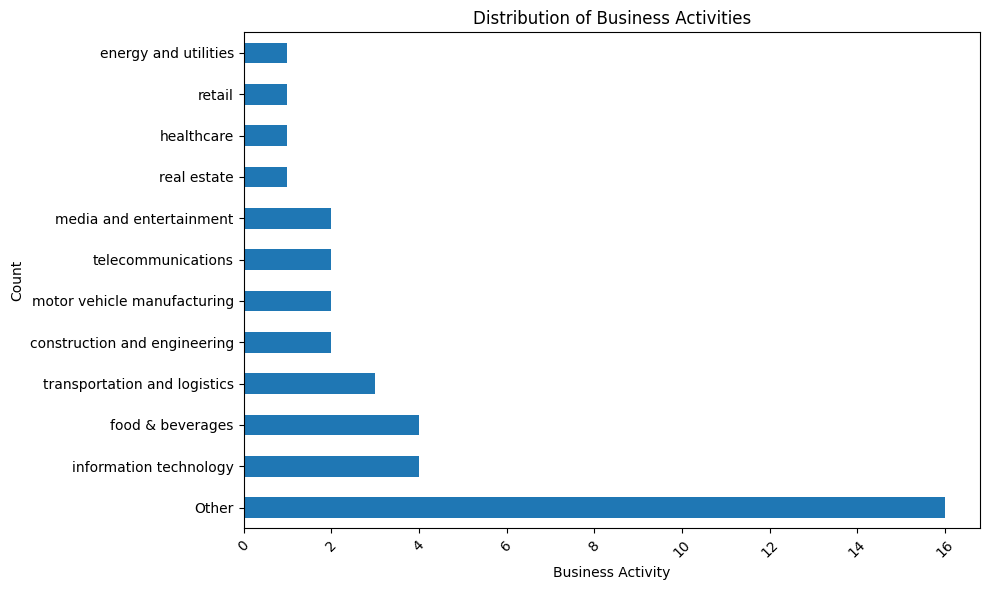

In [64]:
activity_distribution = data['Business Activity'].value_counts()

plt.figure(figsize=(10, 6))
activity_distribution.plot(kind='barh')
plt.title('Distribution of Business Activities')
plt.xlabel('Business Activity')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [54]:
# Clustering using KMeans
kmeans = KMeans(n_clusters=10, random_state=0).fit(X)
data['Cluster'] = kmeans.labels_

grouped_data = data.groupby('Cluster')['Company'].apply(list).reset_index()

In [66]:
grouped_data

,Cluster,Company
0,0,"[MEGACHEM LIMITED, SINGAPORE AIRLINES LIMITED]"
1,1,"[F J BENJAMIN HOLDINGS LTD, HEETON HOLDINGS LI..."
2,2,"[BRC ASIA LIMITED, TAI SIN ELECTRIC LIMITED]"
3,3,"[ALLIANCE HEALTHCARE GROUP LIMITED, CASA HOLDI..."
4,4,"[ABR HOLDINGS LIMITED, AP OIL INTERNATIONAL LI..."
5,5,"[PSC CORPORATION LTD, STARHUB LTD]"
6,6,"[ACMA LTD, ADVANCED SYSTEMS AUTOMATION LIMITED..."
7,7,"[ANNAIK LIMITED, CHEMICAL INDUSTRIES (FAR EAST..."
8,8,[CHINA AVIATION OIL (SINGAPORE) CORPORATION LT...
9,9,"[ABUNDANTE LIMITED, OSSIA INTERNATIONAL LIMITE..."


Recommendation model (Main Page)

In [16]:
data.head(1)

,Company,Linkedin Page,Org Category,Org Website,Text Content,Org Website Content,Filtered Links,Extracted Text
0,ABR HOLDINGS LIMITED,https://www.linkedin.com/company/abr-holdings-...,Food & Beverages,http://www.abr.com.sg/,ABR Holdings Limited (“ABR”) began as the owne...,"<html lang=""en-US"" class=""has-wpcom-gifting-ba...",['https://abr.com.sg/about-abr/'],abr holdings limited ...


In [17]:
ref.rename(columns = {'entity_name': 'Company'}, inplace = True)
ref = ref.sort_values(by = ['Company', 'ssic_code']).drop_duplicates(subset = 'Company', keep = 'first')
ref = ref[['Company', 'ssic_code']]

#merge original data + ref
test = pd.merge(data, ref, how = 'left', on = 'Company')
ref['Company'] = ref['Company'].apply(lambda x: x[:-1] if x[-1] == '.' else x)

test2 = pd.merge(test[test.ssic_code.isnull()], ref, how = 'left', on = 'Company')
test2.drop(columns='ssic_code_x', inplace = True)
test2.rename(columns={'ssic_code_y':'ssic_code'}, inplace = True)

df_main_processed = pd.concat([test[~ test.ssic_code.isnull()], test2], axis = 0)

In [18]:
df_main_processed = df_main_processed[['Company', 'ssic_code', 'Extracted Text']][(df_main_processed.ssic_code.notnull()) & (df_main_processed['Extracted Text'].notnull())].reset_index(drop = True)

In [19]:
df_main_processed.shape[0]

37

In [20]:
#train = df_main_processed.sample(round(df_main_processed.shape[0]*0.7)).reset_index(drop = True)
#test = df_main_processed[~df_main_processed.index.isin(train.index)].reset_index(drop = True)

train = df_main_processed.sample(round(df_main_processed.shape[0]*0.7)).reset_index(drop = True)
test = df_main_processed[~df_main_processed.Company.isin(train.Company)].reset_index(drop = True)

In [21]:
train.shape[0]
#train.head(1)

26

In [22]:
test.shape[0]

11

In [95]:
for column in ssic.columns:
    ssic.loc[((ssic[column] == '<Blank>') | (ssic[column].isnull())), column] = ''
ssic = ssic[~ssic['SSIC 2020'].str.match(r'^[A-Z]$')]

In [96]:
# Define a cleaning function
def clean_text(text):
    if isinstance(text, str):
        # Replace newline characters with space
        text = text.replace('\n', ' ')
        # Replace special characters (bullet points) with a consistent delimiter
        text = text.replace('•', '- ')
        # Strip leading and trailing whitespace
        text = text.strip()
        text= text.lower()
        # Replace multiple spaces with a single space
        text = ' '.join(text.split())
    return text

# Apply the cleaning function to the 'Info' column
ssic['Detailed Definitions'] = ssic['Detailed Definitions'].apply(clean_text)
ssic['Examples of Activities Classified Under this Code'] = ssic['Examples of Activities Classified Under this Code'].apply(clean_text)

ssic['textonly'] = ssic['SSIC 2020 Title'] + '.' + ssic['Detailed Definitions'] + '.' + ssic['Examples of Activities Classified Under this Code']
ssic = ssic[['SSIC 2020', 'textonly']]
ssic.columns = ['ssic_code', 'Extracted Text']
ssic = ssic[ssic['Extracted Text'].notnull()]

In [104]:
ssic

,ssic_code,Extracted Text
1,01,AGRICULTURE AND RELATED SERVICE ACTIVITIES..
2,011,"GROWING OF CROPS, MARKET GARDENING AND HORTICU..."
3,0111,Growing of Food Crops (Non-Hydroponics)..
4,01111,Growing of leafy and fruit vegetables.this sub...
5,01112,Growing of mushrooms.this sub-class includes t...
...,...,...
7118,97002,Activities of households as employers of other...
7119,99010,Foreign embassies and trade representative off...
7120,99010,Foreign embassies and trade representative off...
7121,99020,Foreign armed forces.foreign armed force base.


In [23]:
train = pd.concat([train, ssic], axis = 0).reset_index(drop = True)

In [24]:
train['Extracted Text'] = train['Extracted Text'].fillna('')
textonly = train['Extracted Text'].astype(str).str.lower()

# Tokenize
text_tokens = [word_tokenize(t) for t in textonly]

# Create tagged documents
tagged_data = [TaggedDocument(d, [i]) for i, d in enumerate(text_tokens)]

# Train Doc2Vec model
model = Doc2Vec(tagged_data, vector_size=64, min_count=2, epochs=40)

In [27]:
recsys_df = pd.DataFrame(columns = ["Company", "actualSSIC", "recSSIC", "score"])

for index, series in test.iterrows():

    test_doc = word_tokenize(series['Extracted Text'].lower())
    test_vec = model.infer_vector(test_doc)
    results = model.docvecs.most_similar(positive=[test_vec], topn=50)

    for i, (index, similarity_score) in enumerate(results):
        coy = series["Company"]
        actualssic = series['ssic_code']
        recssic = train["ssic_code"][index]
        score = similarity_score
        row = [coy, actualssic, recssic, score]
        recsys_df.loc[len(recsys_df)] = row

recsys_df.drop_duplicates(subset = ['Company', 'recSSIC'], keep = 'first', inplace = True)
recsys_df['rank'] = recsys_df.groupby('Company').cumcount()+1
recsys_df = recsys_df[recsys_df['rank'] <= 5]
recsys_df['actualSSIC'] = recsys_df['actualSSIC'].astype('Int64')

recsys_df

C:\Users\Admin\AppData\Local\Temp\ipykernel_17348\940995640.py:7: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  results = model.docvecs.most_similar(positive=[test_vec], topn=50)
C:\Users\Admin\AppData\Local\Temp\ipykernel_17348\940995640.py:7: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  results = model.docvecs.most_similar(positive=[test_vec], topn=50)
C:\Users\Admin\AppData\Local\Temp\ipykernel_17348\940995640.py:7: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  results = model.docvecs.most_similar(positive=[test_vec], topn=50)
C:\Users\Admin\AppData\Local\Temp\ipykernel_17348\940995640.py:7: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  results = model.docvecs.most_similar(positive=[test_vec], topn=50)
C:\Users\Admin\AppData\Local\Temp\ipykernel_17348\940995640.py:7: De

,Company,actualSSIC,recSSIC,score,rank
0,ADVANCED SYSTEMS AUTOMATION LIMITED,32909,46610.0,0.610394,1
1,ADVANCED SYSTEMS AUTOMATION LIMITED,32909,26119.0,0.525495,2
2,ADVANCED SYSTEMS AUTOMATION LIMITED,32909,86909.0,0.501025,3
3,ADVANCED SYSTEMS AUTOMATION LIMITED,32909,46900.0,0.483195,4
4,ADVANCED SYSTEMS AUTOMATION LIMITED,32909,46541.0,0.479124,5
50,BRC ASIA LIMITED,24109,27322.0,0.816075,1
51,BRC ASIA LIMITED,24109,46541.0,0.667736,2
52,BRC ASIA LIMITED,24109,46620.0,0.647968,3
53,BRC ASIA LIMITED,24109,82999.0,0.646996,4
54,BRC ASIA LIMITED,24109,26119.0,0.601569,5


In [29]:
recsysAccuracy_df = recsys_df.copy()

recsysAccuracy_df['actualSSIC'] = recsysAccuracy_df['actualSSIC'].apply(lambda x: str(x)[0:2])
recsysAccuracy_df['recSSIC'] = recsysAccuracy_df['recSSIC'].apply(lambda x: str(x)[0:2])

recsysAccuracy_df.loc[recsysAccuracy_df.actualSSIC == recsysAccuracy_df.recSSIC, 'match'] = 1
recsysAccuracy_df.loc[recsysAccuracy_df.match != 1, 'match'] = 0

recsysAccuracy_df = recsysAccuracy_df.sort_values(by = ['Company', 'match'], ascending=False).groupby('Company').head(1).reset_index(drop = True)
matchAccuracy = len(recsysAccuracy_df[recsysAccuracy_df.match == 1].match)/recsysAccuracy_df.shape[0]

print(f'Accuracy of Recommendation Model: {round(matchAccuracy*100,1)}%')

Accuracy of Recommendation Model: 27.3%


In [102]:
recsysStats_df = recsys_df.copy()

recsysStats_df['actualSSIC'] = recsysStats_df['actualSSIC'].apply(lambda x: str(x)[0:2])
recsysStats_df['recSSIC'] = recsysStats_df['recSSIC'].apply(lambda x: str(x)[0:2])

recsysStats_df['recSSIC'] = recsysStats_df['recSSIC'].astype('int64')
recsysStats_df = recsysStats_df.groupby('Company')['recSSIC'].agg(['mean', 'std']).reset_index()
recsysStats_df['mean'] = round(recsysStats_df['mean'],1)
recsysStats_df['std'] = round(recsysStats_df['std'],1)
print(f"Overall Stats:\n{round(recsysStats_df.mean(),1)}")
recsysStats_df

Overall Stats:
mean    58.5
std     20.0
dtype: float64


C:\Users\Admin\AppData\Local\Temp\ipykernel_14480\3324467219.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(f"Overall Stats:\n{round(recsysStats_df.mean(),1)}")


,Company,mean,std
0,CHEMICAL INDUSTRIES (FAR EAST) LIMITED,51.7,27.9
1,CREATIVE TECHNOLOGY LTD,62.7,17.8
2,MANUFACTURING INTEGRATION TECHNOLOGY LTD,51.7,27.9
3,PSC CORPORATION LTD,70.0,20.8
4,SAKAE HOLDINGS LTD,61.3,18.6
5,SINGAPORE AIRLINES LIMITED,58.3,17.2
6,SINGAPORE TELECOMMUNICATIONS LIMITED,62.0,15.5
7,SITRA HOLDINGS (INTERNATIONAL) LIMITED,55.3,16.2
8,STARHUB LTD,51.7,8.1
9,TAI SIN ELECTRIC LIMITED,51.7,27.9


Recommendation model (Sub Page)

In [52]:
df_sub_processed = pd.concat([test[~ test.ssic_code.isnull()], test2], axis = 0)
df_sub_processed = df_sub_processed[['Company', 'ssic_code', 'Extracted Text']][(df_sub_processed.ssic_code.notnull()) & (df_sub_processed['Extracted Text'].notnull())].reset_index(drop = True)

df_sub_processed.head(1)

,Company,ssic_code,Extracted Text
0,TAI SIN ELECTRIC LIMITED,27322.0,tai sin electric limited - a leading total pow...


In [60]:
train = df_sub_processed.sample(round(df_sub_processed.shape[0]*0.8)).reset_index(drop=True)
test = df_sub_processed[~df_sub_processed.index.isin(train.index)].reset_index(drop=True)

In [61]:
train.shape[0]

11

In [62]:
test.shape[0]

3

In [63]:
train = pd.concat([train, ssic], axis=0).reset_index(drop=True)

# Fill NaN values in 'Extracted Text' with empty strings
train['Extracted Text'] = train['Extracted Text'].fillna('')
textonly = train['Extracted Text'].astype(str).str.lower()

# Tokenize the text
text_tokens = [word_tokenize(t) for t in textonly]

# Create tagged documents
tagged_data = [TaggedDocument(d, [i]) for i, d in enumerate(text_tokens)]

# Train the Doc2Vec model
model = Doc2Vec(tagged_data, vector_size=64, min_count=2, epochs=40)


In [64]:
recsys_df = pd.DataFrame(columns=["Company", "actualSSIC", "recSSIC", "score"])

# Generate recommendations
for index, series in test.iterrows():
    test_doc = word_tokenize(series['Extracted Text'].lower())
    test_vec = model.infer_vector(test_doc)
    results = model.dv.most_similar(positive=[test_vec], topn=50)

    for i, (index, similarity_score) in enumerate(results):
        coy = series["Company"]
        actualssic = series['ssic_code']
        recssic = train["ssic_code"][index]
        score = similarity_score
        row = [coy, actualssic, recssic, score]
        recsys_df.loc[len(recsys_df)] = row

# Remove duplicates and rank the recommendations
recsys_df.drop_duplicates(subset=['Company', 'recSSIC'], keep='first', inplace=True)
recsys_df['rank'] = recsys_df.groupby('Company').cumcount() + 1
recsys_df = recsys_df[recsys_df['rank'] <= 3]
recsys_df['actualSSIC'] = recsys_df['actualSSIC'].astype('Int64')
recsys_df

,Company,actualSSIC,recSSIC,score,rank
0,PSC CORPORATION LTD,46900,46900.0,0.990269,1
1,PSC CORPORATION LTD,46900,26119.0,0.741130,2
2,PSC CORPORATION LTD,46900,27322.0,0.628230,3
50,SAKAE HOLDINGS LTD,56122,56122.0,0.938022,1
52,SAKAE HOLDINGS LTD,56122,70205,0.565388,2
53,SAKAE HOLDINGS LTD,56122,55102,0.564872,3
100,STARHUB LTD,61011,61011.0,0.985310,1
102,STARHUB LTD,61011,87022,0.556886,2
103,STARHUB LTD,61011,63201,0.546087,3


In [65]:
recsysAccuracy_df = recsys_df.copy()

# Simplify the SSIC codes for comparison
recsysAccuracy_df['actualSSIC'] = recsysAccuracy_df['actualSSIC'].apply(lambda x: str(x)[0:2])
recsysAccuracy_df['recSSIC'] = recsysAccuracy_df['recSSIC'].apply(lambda x: str(x)[0:2])

# Mark matches
recsysAccuracy_df.loc[recsysAccuracy_df.actualSSIC == recsysAccuracy_df.recSSIC, 'match'] = 1
recsysAccuracy_df.loc[recsysAccuracy_df.match != 1, 'match'] = 0

# Calculate the accuracy of the recommendation model
recsysAccuracy_df = recsysAccuracy_df.sort_values(by=['Company', 'match'], ascending=False).groupby('Company').head(1).reset_index(drop=True)
matchAccuracy = len(recsysAccuracy_df[recsysAccuracy_df.match == 1].match) / recsysAccuracy_df.shape[0]

print(f'Accuracy of Recommendation Model: {round(matchAccuracy*100,1)}%')

Accuracy of Recommendation Model: 100.0%
